<a href="https://colab.research.google.com/github/perdanaazz/ML-Research/blob/main/Project_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import numpy as np
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url = '/content/drive/MyDrive/Experimental/Dataset/Groundwater.csv'
dataset = pd.read_csv(url)

# Menampilkan nilai unik
# unique_situation = dataset.iloc[:, 13].unique()
# print("Nilai Unik pada Kolom ke-11:")
# print(unique_situation)

In [ ]:
len(dataset)

29

In [ ]:
dataset.head()

,States,Recharge from rainfallMonsoon season,Recharge from other sources,Recharge from rainfallNon-monsoon season,Recharge from other sources.1,Total_Rainfall,Natural discharge during non-monsoon season,Net annual groundwater availability,Irrigation,Domestic and industrial uses,Total_Usage,Projected demand for domestic and industrial uses upto 2025,Groundwater availability for future irrigation use,Situation
0,Andhra Pradesh,15.1,6.5000,5.5,6.7000,33.8,3.1,30.8,12.600,1.500,14.200,2.70,15.9,EXCESS
1,Arunachal Pradesh,3.4,0.0003,1.0,0.0004,4.5,0.5,4.0,0.002,0.001,0.003,0.01,4.0,SEMICRITICAL
2,Assam,19.0,2.2000,8.6,0.6000,30.4,2.5,27.8,5.300,0.700,6.000,1.00,21.5,EXCESS
3,Bihar,18.9,3.9000,3.4,2.4000,28.6,2.4,26.2,9.800,1.600,11.400,2.60,13.9,MODERATED
4,Chhattisgarh,9.9,0.6000,0.9,0.9000,12.2,0.6,11.6,3.100,0.500,3.600,0.60,7.9,MODERATED


In [ ]:
num_rows, num_columns = dataset.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 29
Number of columns: 14


In [ ]:
feature = ['States', 'Recharge from rainfallMonsoon season', 'Recharge from rainfallNon-monsoon season', 'Total_Rainfall', 'Natural discharge during non-monsoon season', 'Net annual groundwater availability', 'Irrigation', 'Domestic and industrial uses', 'Total_Usage', 'Groundwater availability for future irrigation use', 'Situation']
selected_feature = dataset[feature]
selected_feature.head()

,States,Recharge from rainfallMonsoon season,Recharge from rainfallNon-monsoon season,Total_Rainfall,Natural discharge during non-monsoon season,Net annual groundwater availability,Irrigation,Domestic and industrial uses,Total_Usage,Groundwater availability for future irrigation use,Situation
0,Andhra Pradesh,15.1,5.5,33.8,3.1,30.8,12.600,1.500,14.200,15.9,EXCESS
1,Arunachal Pradesh,3.4,1.0,4.5,0.5,4.0,0.002,0.001,0.003,4.0,SEMICRITICAL
2,Assam,19.0,8.6,30.4,2.5,27.8,5.300,0.700,6.000,21.5,EXCESS
3,Bihar,18.9,3.4,28.6,2.4,26.2,9.800,1.600,11.400,13.9,MODERATED
4,Chhattisgarh,9.9,0.9,12.2,0.6,11.6,3.100,0.500,3.600,7.9,MODERATED


KNN

In [ ]:
X = selected_feature.iloc[:, 1:9].values
y = selected_feature.iloc[:, 10].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
X_train

array([[1.82e+01, 5.40e+00, 3.05e+01, 2.90e+00, 2.76e+01, 1.01e+01,
        8.00e-01, 1.09e+01],
       [7.50e+00, 2.20e+00, 2.29e+01, 2.30e+00, 2.07e+01, 1.47e+01,
        1.90e+00, 1.66e+01],
       [2.00e-01, 2.00e-01, 4.00e-01, 4.00e-02, 4.00e-01, 3.00e-03,
        1.00e-03, 4.00e-03],
       [9.90e+00, 9.00e-01, 1.22e+01, 6.00e-01, 1.16e+01, 3.10e+00,
        5.00e-01, 3.60e+00],
       [4.00e-01, 1.00e-01, 6.00e-01, 1.00e-01, 5.00e-01, 2.00e-01,
        1.00e-01, 3.00e-01],
       [1.70e+00, 7.00e-01, 3.00e+00, 2.00e-01, 2.70e+00, 1.00e-01,
        1.00e-01, 2.00e-01],
       [3.50e+00, 1.00e+00, 1.05e+01, 7.00e-01, 9.80e+00, 1.17e+01,
        7.00e-01, 1.24e+01],
       [1.22e+01, 0.00e+00, 1.84e+01, 1.10e+00, 1.74e+01, 1.19e+01,
        1.10e+00, 1.30e+01],
       [1.13e+01, 1.30e+00, 1.78e+01, 1.10e+00, 1.67e+01, 3.50e+00,
        9.00e-01, 4.40e+00],
       [2.75e+01, 8.00e-01, 3.40e+01, 1.70e+00, 3.23e+01, 1.67e+01,
        1.30e+00, 1.80e+01],
       [0.00e+00, 0.00e+00, 0.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[ 1.29313105,  3.3182217 ,  1.44557335,  2.10197324,  1.38008917,
         0.31849893,  0.21337483,  0.31943041],
       [-0.04115075,  0.86312125,  0.813083  ,  1.44544854,  0.7632396 ,
         0.85133828,  2.05512243,  0.95192193],
       [-0.95145515, -0.67131653, -1.05942134, -1.02746115, -1.05154973,
        -0.85108344, -1.12440365, -0.88962706],
       [ 0.25812741, -0.13426331, -0.07739685, -0.41470477, -0.05028665,
        -0.49234356, -0.28891997, -0.49060259],
       [-0.92651531, -0.74803842, -1.04277686, -0.96180868, -1.04260988,
        -0.82826402, -0.95864637, -0.85678189],
       [-0.7644063 , -0.28770708, -0.84304307, -0.8523879 , -0.8459332 ,
        -0.83984748, -0.95864637, -0.86787823],
       [-0.53994768, -0.05754142, -0.21887495, -0.30528398, -0.21120393,
         0.50383435,  0.04594323,  0.48587555],
       [ 0.54493565, -0.82476031,  0.43858213,  0.13239915,  0.46822459,
         0.52700128,  0.71566963,  0.5524536 ],
       [ 0.43270634,  0.17262425

In [ ]:
error = []

for i in range (1,10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

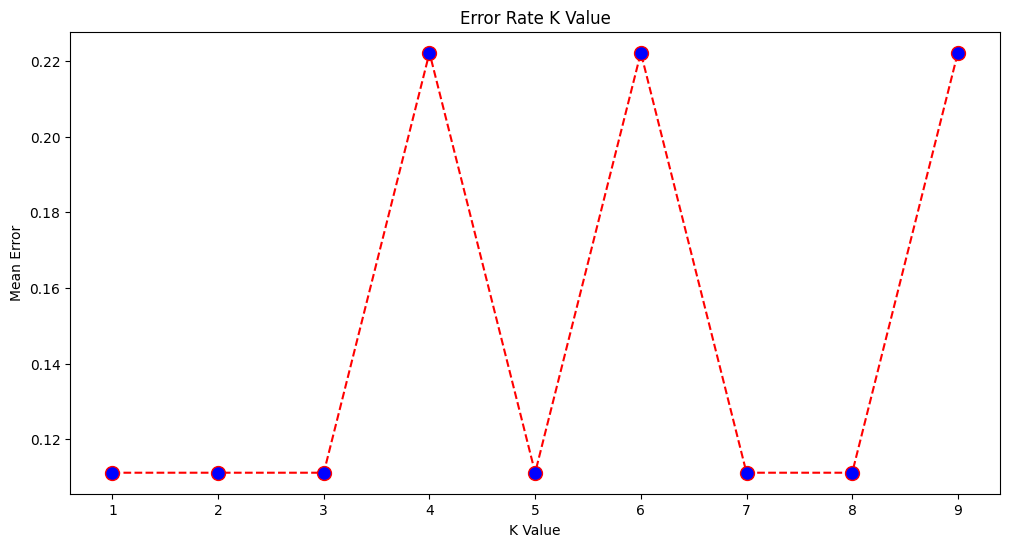

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,10), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

['CRITICAL', 'EXCESS', 'MODERATED', 'SEMICRITICAL ']


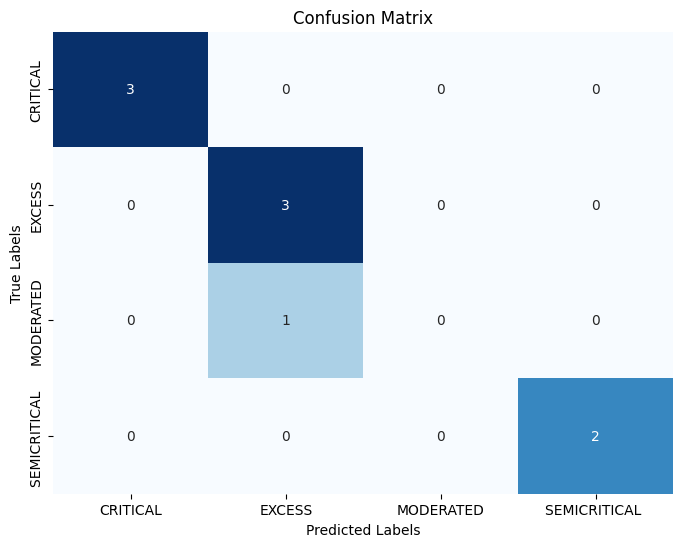

Classification Report:
               precision    recall  f1-score   support

     CRITICAL       1.00      1.00      1.00         3
       EXCESS       0.75      1.00      0.86         3
    MODERATED       0.00      0.00      0.00         1
SEMICRITICAL        1.00      1.00      1.00         2

     accuracy                           0.89         9
    macro avg       0.69      0.75      0.71         9
 weighted avg       0.81      0.89      0.84         9



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Asumsi Anda telah mendefinisikan X_train, y_train, X_test, y_test sebelumnya

# Membuat dan melatih model KNN
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)

# Melakukan prediksi
y_pred = classifier.predict(X_test)

# Hitung confusion matrix, classification report, dan akurasi
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, zero_division=0)

# Mengambil nama kelas dari label y_test
class_labels = sorted(set(y_test) | set(y_pred))
print(class_labels);

# Menampilkan confusion matrix dengan label yang sesuai
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Menampilkan classification report
print("Classification Report:")
print(cr)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Asumsi Anda telah mendefinisikan X dan y sebelumnya

# Membuat model KNN
classifier = KNeighborsClassifier(n_neighbors=2)

# Menentukan jumlah fold (misalnya, 5 fold)
num_folds = 10

# Membuat objek KFold
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Melakukan K-Fold Cross Validation
scores = cross_val_score(classifier, X, y, cv=kfold, scoring='accuracy')

# Menampilkan skor hasil cross-validation untuk setiap fold
for i, score in enumerate(scores, start=1):
    print(f'Fold {i}: {score:.4f}')

# Menampilkan rata-rata skor akhir
print(f'Rata-rata Accuracy: {np.mean(scores):.4f}')


Fold 1: 0.6667
Fold 2: 0.3333
Fold 3: 0.6667
Fold 4: 1.0000
Fold 5: 0.6667
Fold 6: 0.6667
Fold 7: 0.3333
Fold 8: 0.6667
Fold 9: 0.6667
Fold 10: 1.0000
Rata-rata Accuracy: 0.6667


DECISION TREE

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
feature = ['States', 'Recharge from rainfallMonsoon season', 'Recharge from rainfallNon-monsoon season', 'Total_Rainfall', 'Natural discharge during non-monsoon season', 'Net annual groundwater availability', 'Irrigation', 'Domestic and industrial uses', 'Total_Usage', 'Groundwater availability for future irrigation use', 'Situation']
selected_feature = dataset[feature]
selected_feature.head()

,States,Recharge from rainfallMonsoon season,Recharge from rainfallNon-monsoon season,Total_Rainfall,Natural discharge during non-monsoon season,Net annual groundwater availability,Irrigation,Domestic and industrial uses,Total_Usage,Groundwater availability for future irrigation use,Situation
0,Andhra Pradesh,15.1,5.5,33.8,3.1,30.8,12.600,1.500,14.200,15.9,EXCESS
1,Arunachal Pradesh,3.4,1.0,4.5,0.5,4.0,0.002,0.001,0.003,4.0,SEMICRITICAL
2,Assam,19.0,8.6,30.4,2.5,27.8,5.300,0.700,6.000,21.5,EXCESS
3,Bihar,18.9,3.4,28.6,2.4,26.2,9.800,1.600,11.400,13.9,MODERATED
4,Chhattisgarh,9.9,0.9,12.2,0.6,11.6,3.100,0.500,3.600,7.9,MODERATED


In [ ]:
X = selected_feature.iloc[:, 1:9].values
y = selected_feature.iloc[:, 10].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')

Akurasi: 0.7777777777777778


              precision    recall  f1-score   support

      EXCEES       1.00      1.00      1.00         0
   MODERATED       1.00      0.00      0.00         2
    CRITICAL       1.00      1.00      1.00         4
SEMICRITICAL       1.00      1.00      1.00         0

   micro avg       1.00      0.67      0.80         6
   macro avg       1.00      0.75      0.75         6
weighted avg       1.00      0.67      0.67         6

Accuracy: 0.78


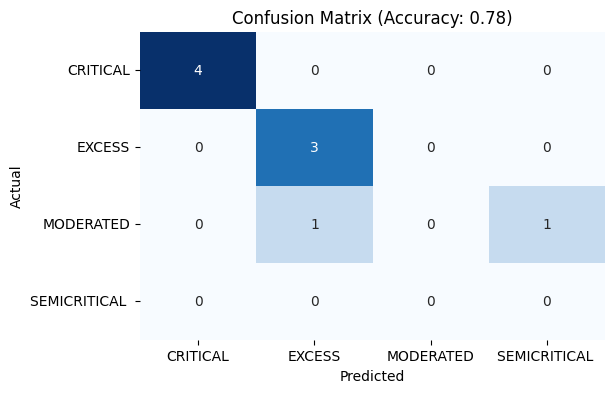

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=['EXCEES', 'MODERATED', 'CRITICAL', 'SEMICRITICAL'], labels=['EXCEES', 'MODERATED', 'CRITICAL', 'SEMICRITICAL'], zero_division=1)
print(report)
cm = confusion_matrix(y_test, y_pred, labels=['EXCEES', 'MODERATED', 'CRITICAL', 'SEMICRITICAL'])

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, zero_division=0)

# Mengambil nama kelas dari label y_test
class_labels = sorted(set(y_test) | set(y_pred))

# Membuat heatmap confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.show()

NAIVE BAYES

In [ ]:
dataset.head()
len(dataset)

29

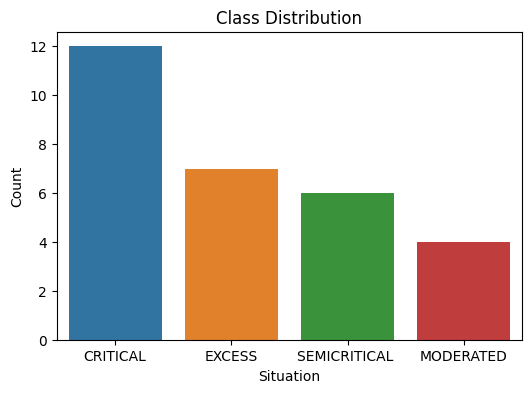

In [ ]:
df = pd.DataFrame(dataset)
class_counts = df['Situation'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Situation')
plt.ylabel('Count')
plt.show()

In [ ]:
feature = ['Recharge from rainfallMonsoon season', 'Recharge from rainfallNon-monsoon season', 'Total_Rainfall', 'Natural discharge during non-monsoon season', 'Net annual groundwater availability', 'Irrigation', 'Domestic and industrial uses', 'Total_Usage', 'Groundwater availability for future irrigation use']
X = dataset[feature]
y = dataset.Situation

In [ ]:
X

,Recharge from rainfallMonsoon season,Recharge from rainfallNon-monsoon season,Total_Rainfall,Natural discharge during non-monsoon season,Net annual groundwater availability,Irrigation,Domestic and industrial uses,Total_Usage,Groundwater availability for future irrigation use
0,15.10,5.50,33.80,3.100,30.80,12.600,1.5000,14.2000,15.90
1,3.40,1.00,4.50,0.500,4.00,0.002,0.0010,0.0030,4.00
2,19.00,8.60,30.40,2.500,27.80,5.300,0.7000,6.0000,21.50
3,18.90,3.40,28.60,2.400,26.20,9.800,1.6000,11.4000,13.90
4,9.90,0.90,12.20,0.600,11.60,3.100,0.5000,3.6000,7.90
5,0.10,0.02,0.30,0.020,0.30,0.100,0.3000,0.4000,0.01
6,0.10,0.01,0.20,0.100,0.10,0.010,0.0300,0.0400,0.10
7,12.20,0.00,18.40,1.100,17.40,11.900,1.1000,13.0000,5.30
8,3.50,1.00,10.50,0.700,9.80,11.700,0.7000,12.4000,-2.70
9,0.40,0.10,0.60,0.100,0.50,0.200,0.1000,0.3000,0.20


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=0)

In [ ]:
X_test

,Recharge from rainfallMonsoon season,Recharge from rainfallNon-monsoon season,Total_Rainfall,Natural discharge during non-monsoon season,Net annual groundwater availability,Irrigation,Domestic and industrial uses,Total_Usage,Groundwater availability for future irrigation use
2,19.0,8.60,30.4,2.50,27.80,5.300,0.70,6.00,21.50
20,11.3,1.30,17.8,1.10,16.70,3.500,0.90,4.40,11.90
23,0.0,0.00,0.0,0.00,0.05,0.003,0.01,0.01,0.03
13,4.8,0.60,6.6,0.60,6.00,1.300,1.50,2.80,3.00
11,4.5,1.10,6.0,0.60,5.40,1.200,0.40,1.60,3.60
25,1.7,0.70,3.0,0.20,2.70,0.100,0.10,0.20,2.40
27,1.3,0.20,2.2,0.10,2.10,1.000,0.03,1.10,1.00
26,40.8,5.40,75.3,6.70,68.60,46.000,3.50,49.50,17.20
5,0.1,0.02,0.3,0.02,0.30,0.100,0.30,0.40,0.01


In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
len(X_test)

9

              precision    recall  f1-score   support

      EXCEES       1.00      1.00      1.00         0
   MODERATED       0.00      1.00      0.00         0
    CRITICAL       0.75      1.00      0.86         3
SEMICRITICAL       1.00      1.00      1.00         0

   micro avg       0.50      1.00      0.67         3
   macro avg       0.69      1.00      0.71         3
weighted avg       0.75      1.00      0.86         3

Accuracy: 0.67


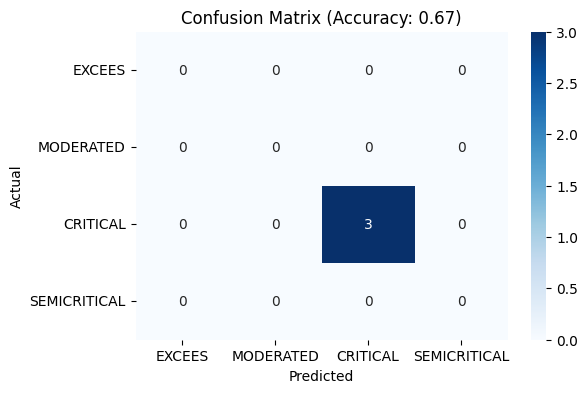

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=['EXCEES', 'MODERATED', 'CRITICAL', 'SEMICRITICAL'], labels=['EXCEES', 'MODERATED', 'CRITICAL', 'SEMICRITICAL'], zero_division=1)
print(report)
cm = confusion_matrix(y_test, y_pred, labels=['EXCEES', 'MODERATED', 'CRITICAL', 'SEMICRITICAL'])

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['EXCEES', 'MODERATED', 'CRITICAL', 'SEMICRITICAL'], yticklabels=['EXCEES', 'MODERATED', 'CRITICAL', 'SEMICRITICAL'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.show()